## 知識情報学 第3回演習サンプルプログラム ex3.ipynb
- Programmed by Nattapong Thammasan, 監修　福井健一
- Last updated: 2019/10/14
- Checked with Python 3.8.8, scikit-learn 1.0
- MIT License

## 決定木学習による識別と決定木の描画
- 要scikit-learn 0.21以降

In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [2]:
# テストデータの割合
test_proportion = 0.3
# Iris データセットをロード  
iris = datasets.load_iris()
# 特徴ベクトルを取得
X = iris.data
# クラスラベルを取得
y = iris.target

In [3]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_proportion, random_state = 1)

In [4]:
# エントロピーを指標とする決定木のインスタンスを生成し，決定木のモデルに学習データを適合させる
tree= DecisionTreeClassifier(criterion='entropy', max_depth=10)
trained_model = tree.fit(X_train, y_train)

### 得られた決定木の描画

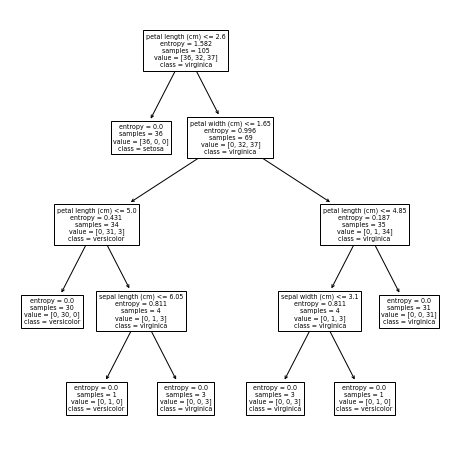

In [5]:
plt.figure(figsize=[8,8])
plot_tree(trained_model, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### 課題1(a) 学習した決定木を用いて学習データおよびテストデータのクラスを予測し，結果をy_train_predicted, y_test_predictedに格納する

In [6]:
y_train_predicted = tree.predict(X_train)
y_test_predicted = tree.predict(X_test)

In [7]:
# テストデータの正解クラスと決定木による予測クラスを出力
print("Test Data")
print("True Label     ", y_test)
print("Predicted Label", y_test_predicted)

Test Data
True Label      [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Predicted Label [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


### 課題1(b) 関数precision_recall_fscore_supportを使用して，学習データおよびテストデータに対するprecision，recall，F値の算出しfscore_train, fscore_testに格納する

In [8]:
fscore_train = precision_recall_fscore_support(y_train, y_train_predicted)
fscore_test = precision_recall_fscore_support(y_test, y_test_predicted)

### 平均precision, recall, F値

In [9]:
print('Training data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][0], fscore_train[1][0], fscore_train[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][1], fscore_train[1][1], fscore_train[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][2], fscore_train[1][2], fscore_train[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (np.average(fscore_train[0]), np.average(fscore_train[1]), np.average(fscore_train[2])))

print('Test data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][0], fscore_test[1][0], fscore_test[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][1], fscore_test[1][1], fscore_test[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][2], fscore_test[1][2], fscore_test[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (np.average(fscore_test[0]), np.average(fscore_test[1]), np.average(fscore_test[2])))

Training data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 2 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Average Precision: 1.000, Recall: 1.000, Fscore: 1.000
Test data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 0.944, Recall: 0.944, Fscore: 0.944
Class 2 Precision: 0.923, Recall: 0.923, Fscore: 0.923
Average Precision: 0.956, Recall: 0.956, Fscore: 0.956


### 課題(c) 10 fold cross-validation を行い，最大深さを変化させたときの学習データおよびテストデータに対する平均Accuracyを算出し，グラフにプロットしなさい
- ヒント：model_selection.cross_validateを使用すると良い

In [10]:
from sklearn.model_selection import cross_validate

In [11]:
depth = range(1,50)
train_scores = []
test_scores = []
for d in depth:
    tree= DecisionTreeClassifier(criterion='entropy', max_depth=d)
    scores = cross_validate(tree,X, y, cv = 10, return_train_score = True)
    train_score = scores['train_score']
    test_score = scores['test_score']
    train_scores.append(train_score.mean())
    test_scores.append(test_score.mean())

Text(0, 0.5, 'mean accuracy')

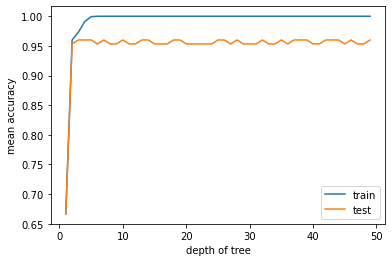

In [12]:
plt.plot(depth, train_scores, label = 'train')
plt.plot(depth, test_scores, label = 'test')
plt.legend()
plt.xlabel('depth of tree')
plt.ylabel('mean accuracy')

### 課題3-2. 決定木の最大深さと分類性能について

In [13]:
print("target 0 の個数 : ",(y == 0).sum())
print("target 1 の個数 : ",(y == 1).sum())
print("target 2 の個数 : ",(y == 2).sum())

target 0 の個数 :  50
target 1 の個数 :  50
target 2 の個数 :  50


まず今回のirisデータは各targetに属するデータの個数が等しい均衡データであるため，正答率で性能を評価しても問題ないと考えることとする．

決定木の深さと分類性能については，一般に決定木の深さが大きくなるほど，決定木の表現力は増していくことが予想される．  
その一方で，最大深さの大きい決定木は過学習しやすくなることが予想される．  
今回扱ったirisデータに対しては前回見たようにほぼほぼ線形分離可能な外れ値の少ないデータセットであったため，決定木の最大深さが大きくなったとしてもか学習を起こすことなくテストデータに対する正答率は95%近くで頭打ちになっている．  
一方で訓練データに対する正答率は木の深さが5を超えたあたりから正答率100%近くになっており今回のデータ分布を表すのに十分な表現力を獲得していることが見て取れる．

ここで決定木の深さが大きくなるについれてどのような分類境界が引かれるのかを可視化するために前回のコードを流用する

In [14]:
from itertools import combinations
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X, y,d):
    plt.figure(figsize = (28,12))
    for ith,axs in enumerate(combinations(range(4),2)):
        ith = ith + 1
        i,j = axs
        x1_min, x1_max = X[:, i].min() , X[:, i].max()
        x2_min, x2_max = X[:, j].min() , X[:, j].max() 
        xx1, xx2 = np.meshgrid(np.arange(x1_min-0.2, x1_max+0.2, 0.02),
                               np.arange(x2_min-0.2, x2_max+0.2, 0.02))
        
        X_std = X[:,:]
        X_std[:,i] = (X[:,i] - x1_min) / (x1_max - x1_min)
        X_std[:,j] = (X[:,j] - x2_min) / (x2_max - x2_min)
        X_std = X_std[:,[i,j]]
        
        tree= DecisionTreeClassifier(criterion='entropy', max_depth=d)
        model = tree.fit(X_std, y)
        Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)

        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        plt.subplot(2,3,ith)

        plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y_train)):
            plt.scatter(x=X_std[y == cl, 0], y=X_std[y == cl, 1],
                        alpha=0.8, c=colors[idx],
                        marker=markers[idx], label=iris.target_names[cl])

        fontsize = 20
        
        plt.xlabel("axis : {}".format(i), fontsize = fontsize)
        plt.ylabel("axis : {}".format(j), fontsize = fontsize)
        plt.legend()

        plt.title('projection of axis {} and {}'.format(i,j), fontsize = fontsize)

まず初めに最大深さd=1の時(決定株)，つまり一つの条件分岐のみをする場合を考える，  
一つの条件分岐しか考えられないため，分類器として2値判別しかできなこととなり，この学習器によって入力特徴量空間は
$$X^+ = \{x \in \mathbb{R}^d | x_i > \alpha\}, \ \ X^- = \{x \in \mathbb{R}^d | x_i \le \alpha\}$$ \
$$\mathbb{R}^d = X^+ \bigsqcup X^-$$
の半空間に直和分割されることとなる．  
ここで$i$は学習則によって選ばれた情報利得が最大となる特徴量を表し，$\alpha$は学習によって選ばれた境界の値を表す．  

決定株のダイアグラムは以下のようになる．

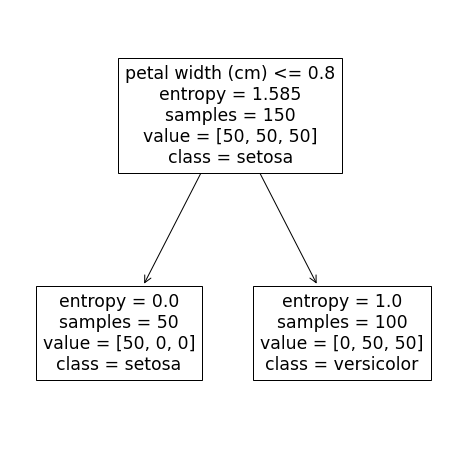

In [15]:
tree= DecisionTreeClassifier(criterion='entropy', max_depth=1)
model = tree.fit(X,y)
plt.figure(figsize=[8,8])
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

さらに最大深さ1の時の決定木(決定株)の分類境界は以下のようになる．

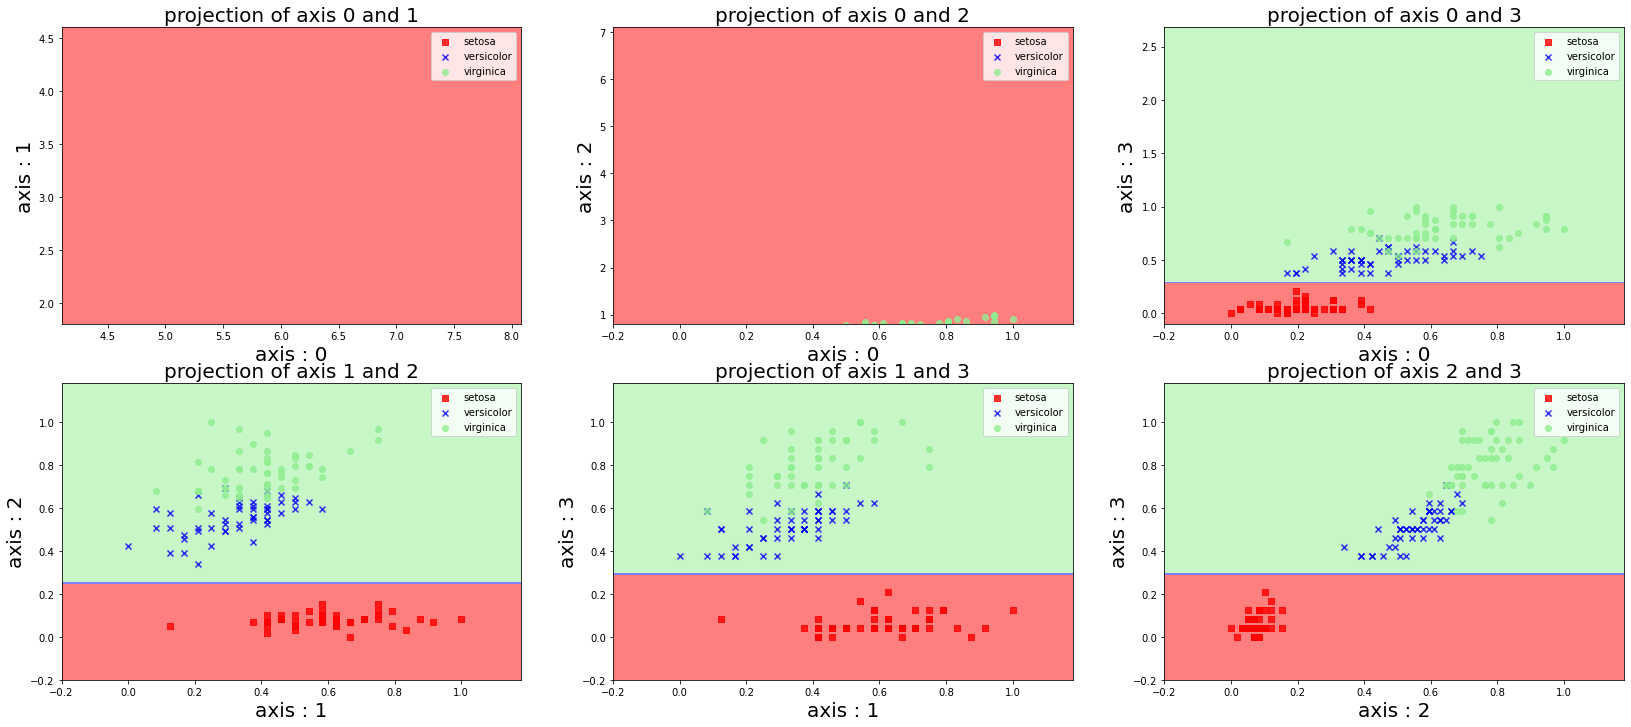

In [16]:
plot_decision_boundary(X, y, 1)

分類境界の図よりどの軸への射影に関しても，比較的分類しやすい赤いクラスとそれ以外のクラスに対してまず分類平面が引かれるということが見て取れる．  
また軸0と軸1(左上)の図においては赤いクラスとそれ以外は線形分離可能であるような分布をしているが，決定木の分離平面は特徴量の軸方向に対しての分割が行われるので，この段階ではうまく分離できていないことが見て取れる．  
深さが浅い制約の元では軸方向の分割を効率よく行うために適当な線形変換によって回転させてうまく分離できるようにするなどの解決策が考えられる．  

続いて深さ2の時の分類境界を以下に示す

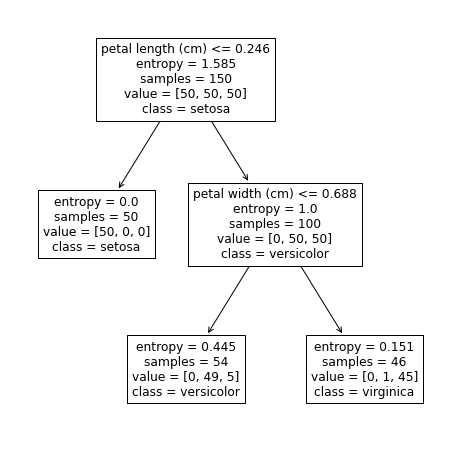

In [17]:
tree= DecisionTreeClassifier(criterion='entropy', max_depth=2)
model = tree.fit(X,y)
plt.figure(figsize=[8,8])
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

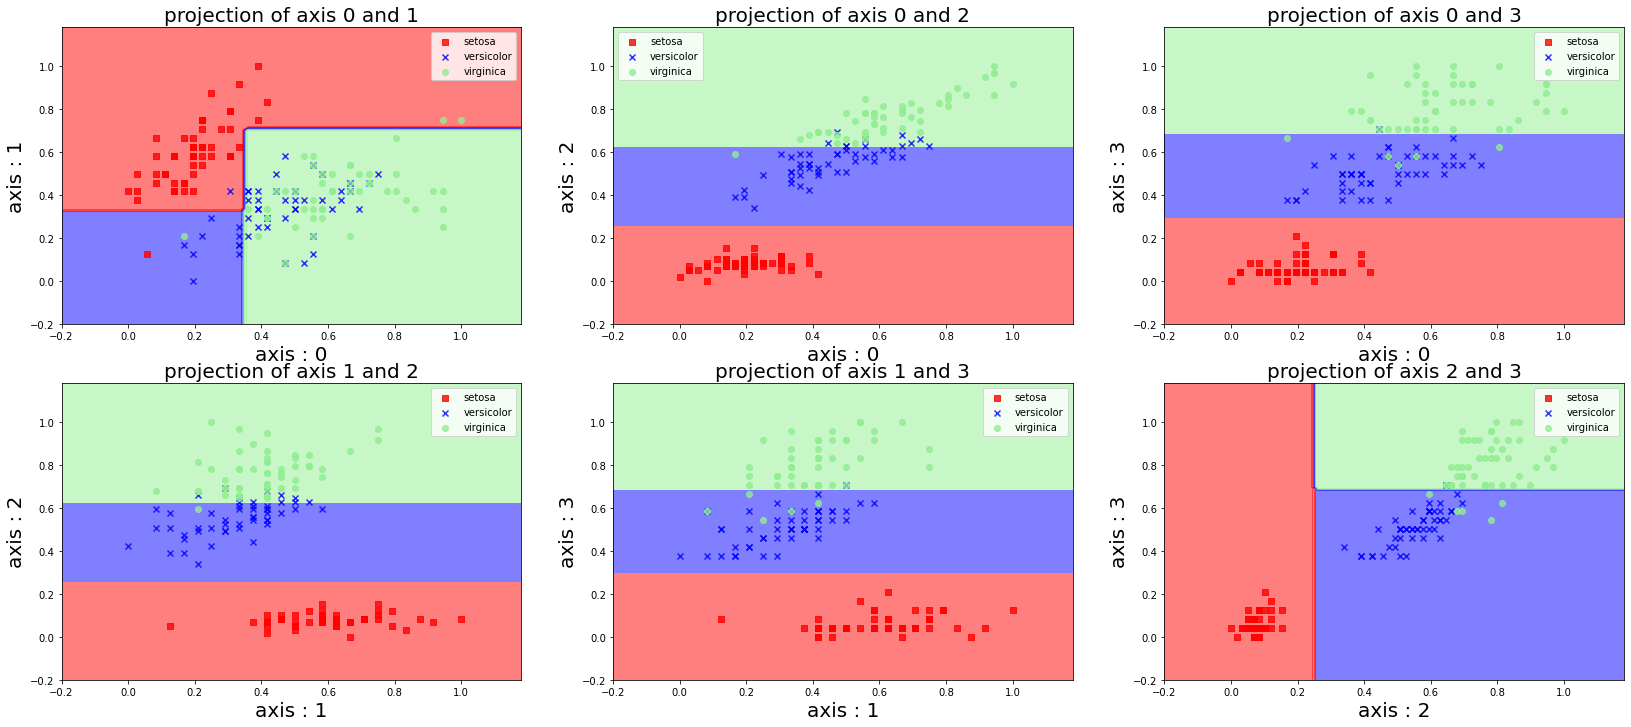

In [18]:
plot_decision_boundary(X,y,2)

最大深さ2の決定木では最大で4クラス分類をすることができる．  
今回は3クラス分類であったので分離境界が三つの領域に分割されていることが見て取れる．  
ここで左上の軸0,1への射影以外のデータに対しては決定木は深さ1,深さ2での条件分岐どちらもy軸の特徴量が選択されていることがわかる．  
一方で左上のデータにしてはまず，x軸方向に分割がされた後にy軸方向に分割が行われたことが見て取れる．  
以下では深さをさらに大きくして行った際にどのように分類境界が変化するかについて見ていく.

#### 深さ3

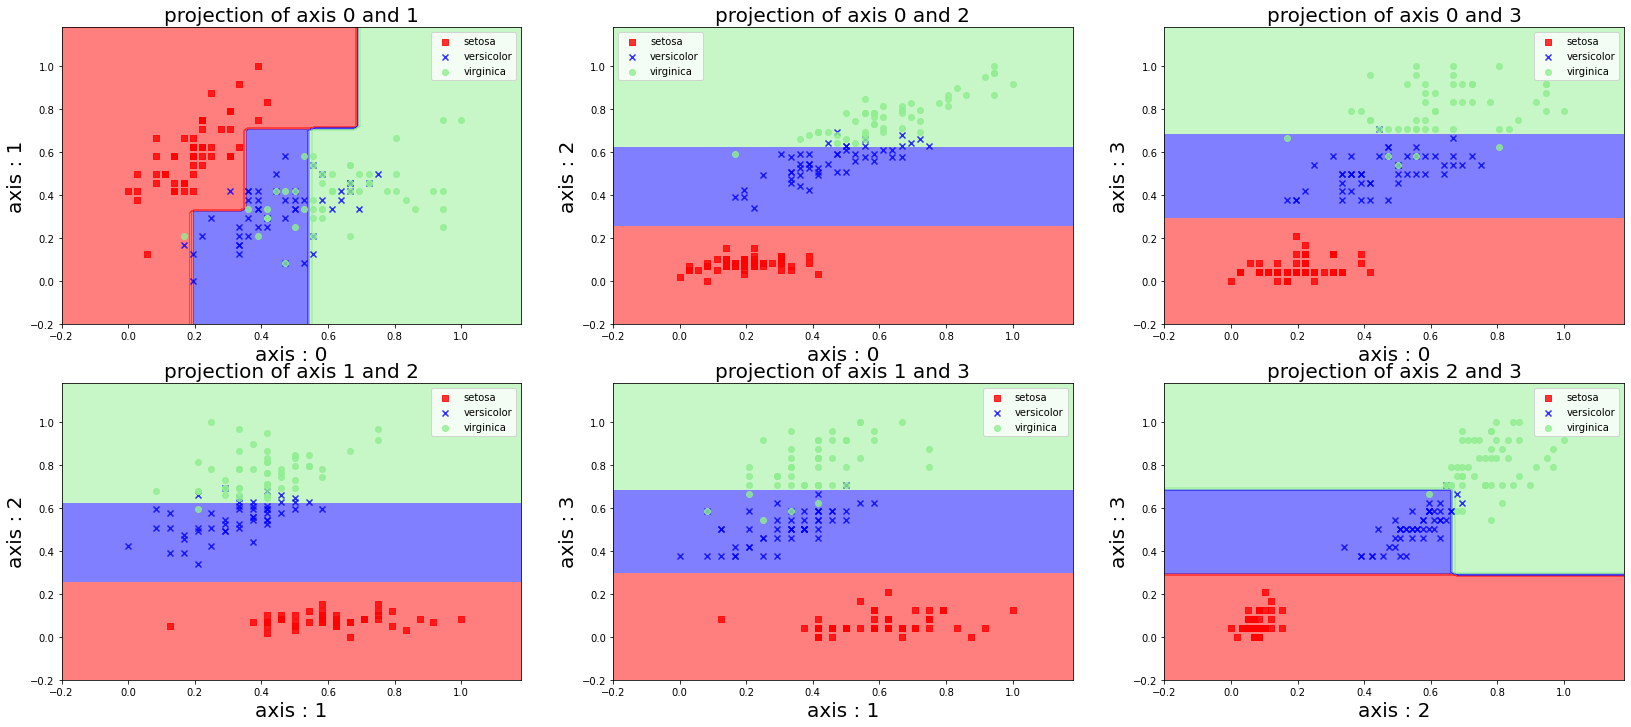

In [19]:
plot_decision_boundary(X,y,3)

#### 深さ4

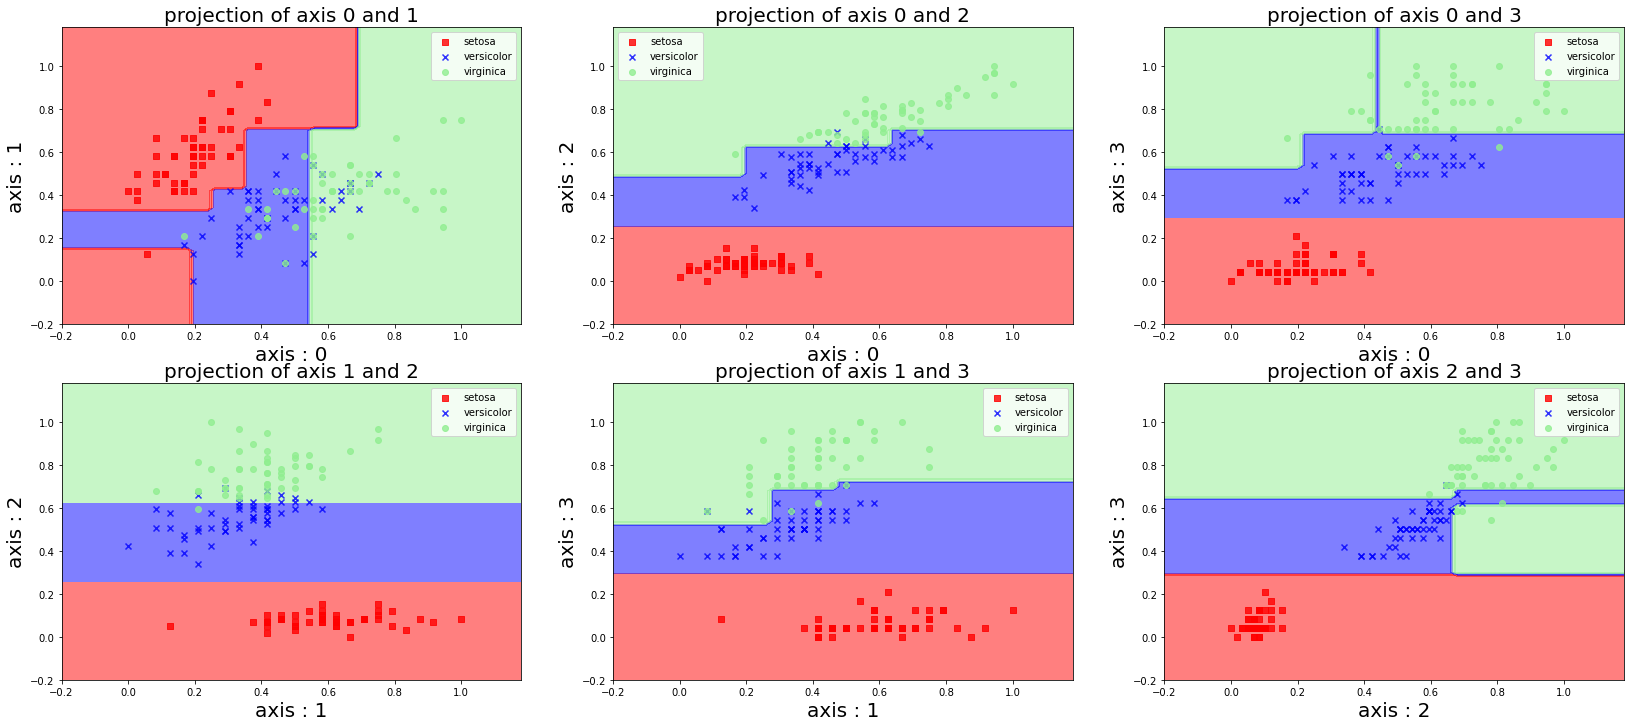

In [20]:
plot_decision_boundary(X,y,4)

#### 深さ5

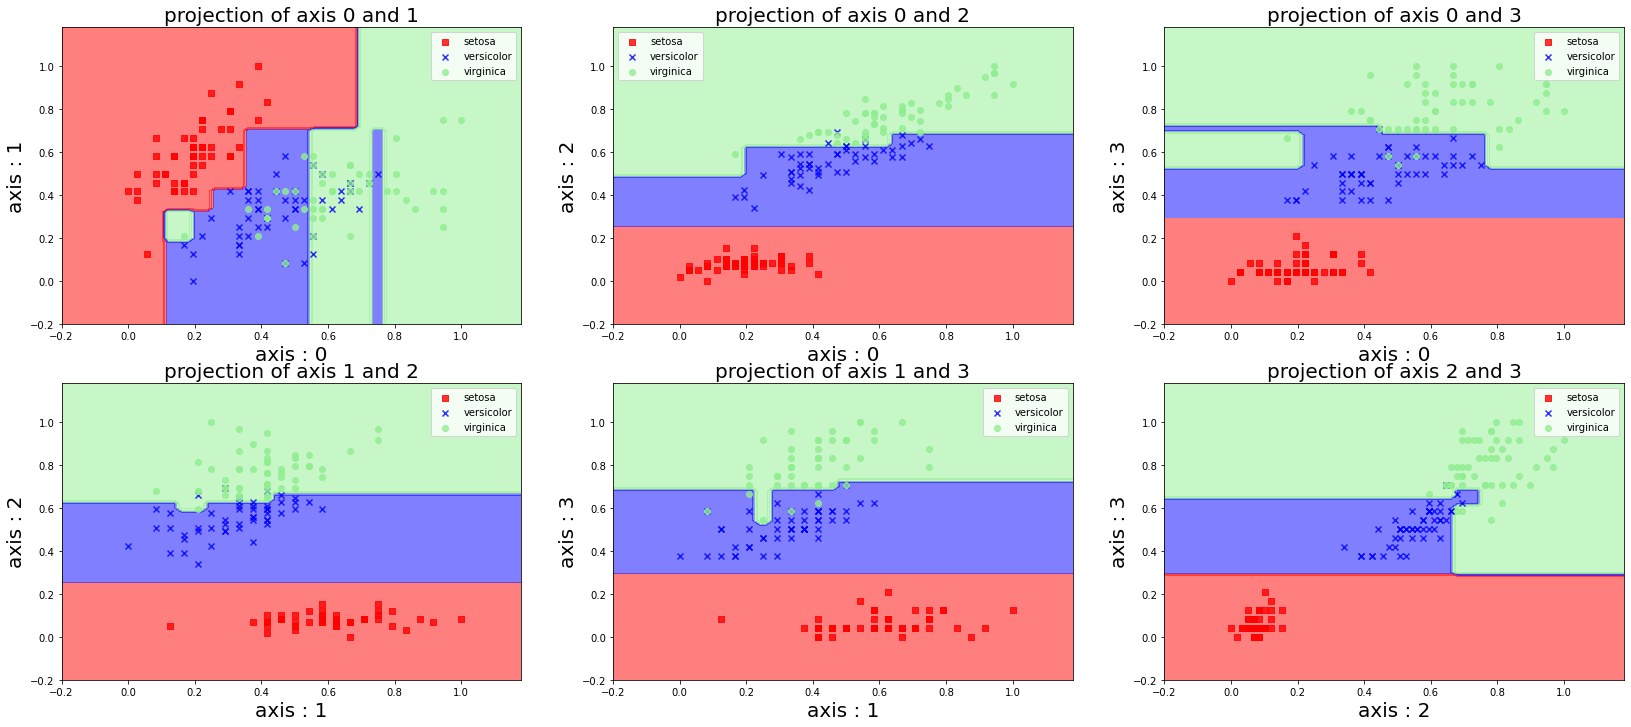

In [21]:
plot_decision_boundary(X,y,5)

#### 深さ6

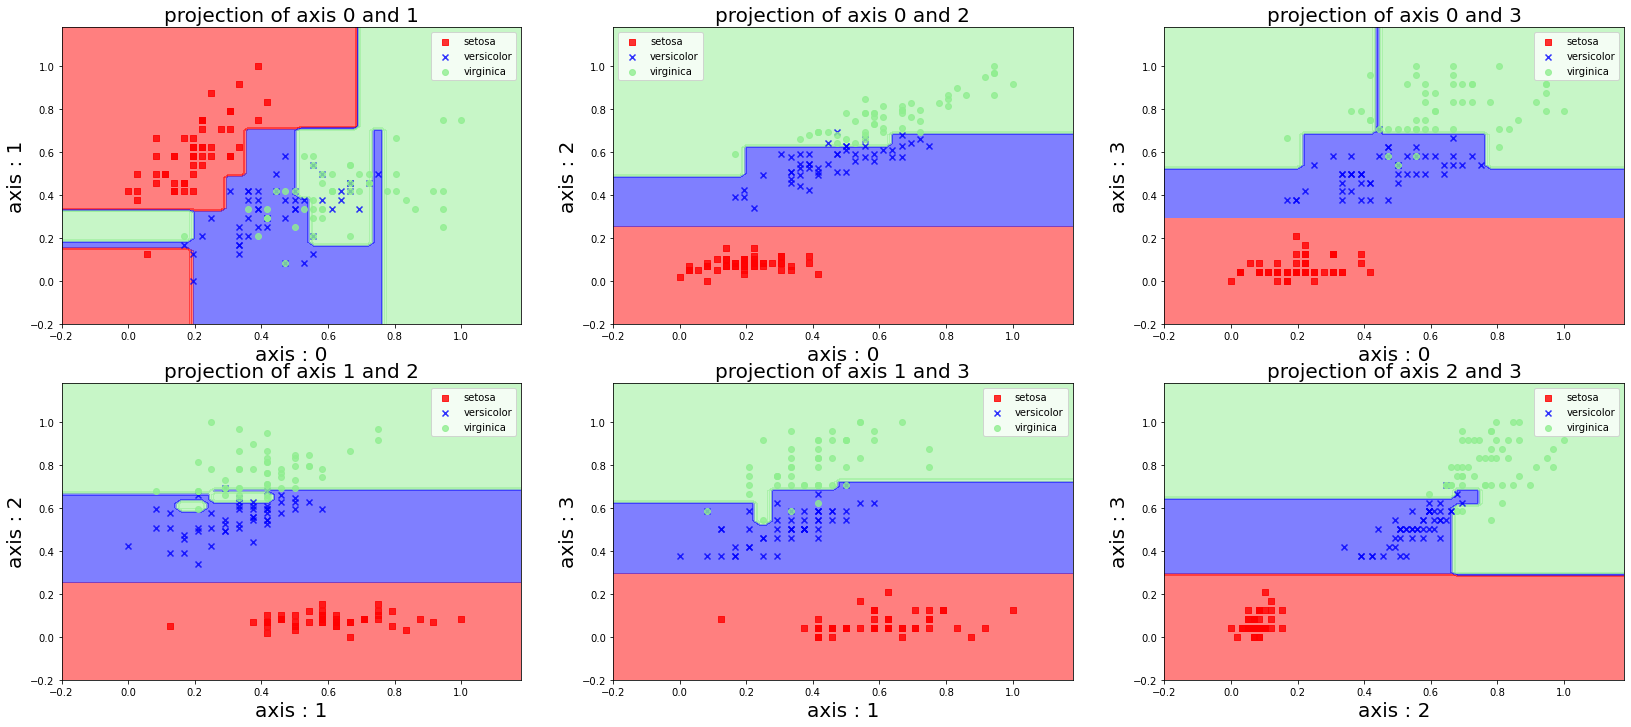

In [22]:
plot_decision_boundary(X,y,6)

#### 深さ7

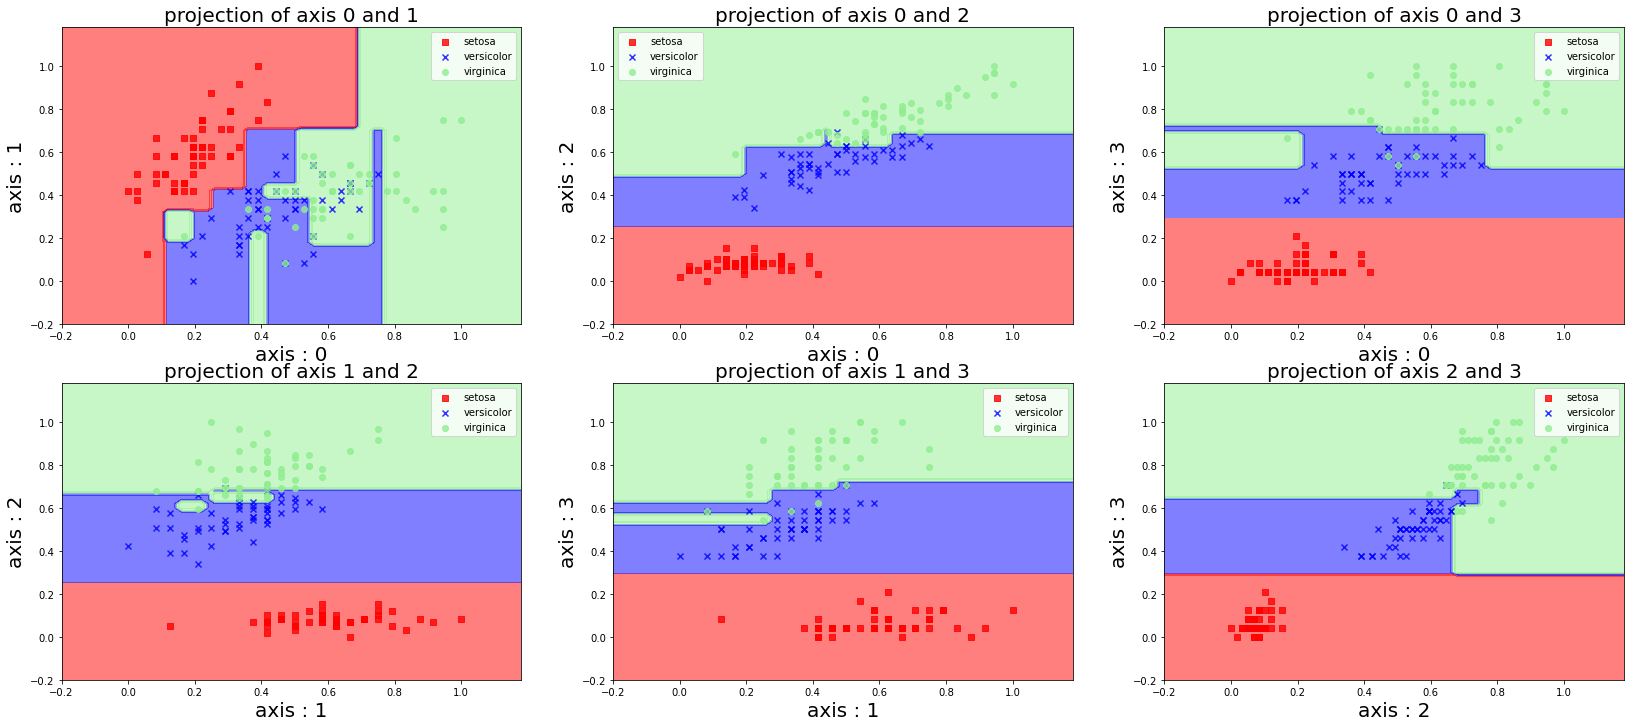

In [23]:
plot_decision_boundary(X,y,7)

#### 深さ8

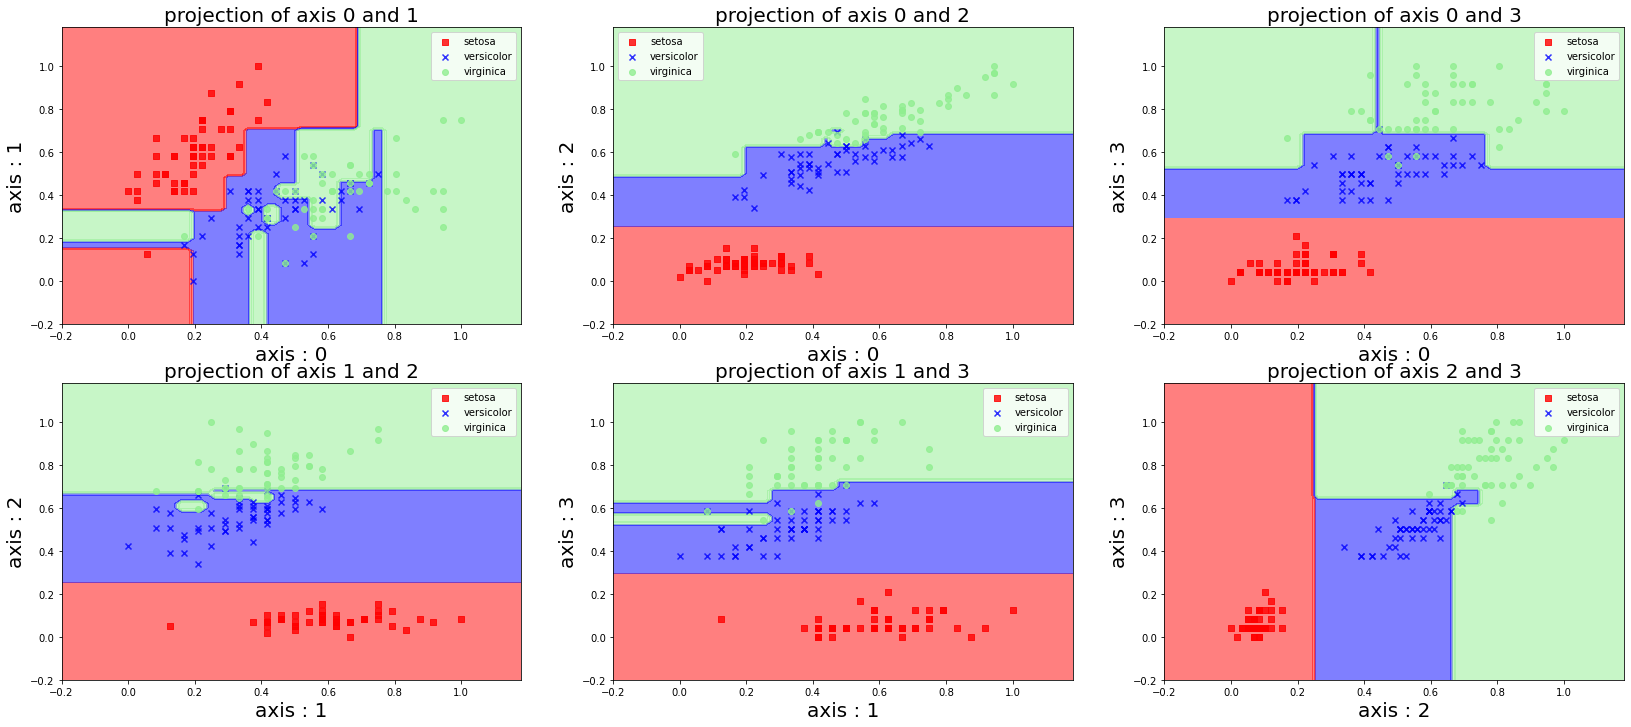

In [24]:
plot_decision_boundary(X,y,8)

#### 深さ20

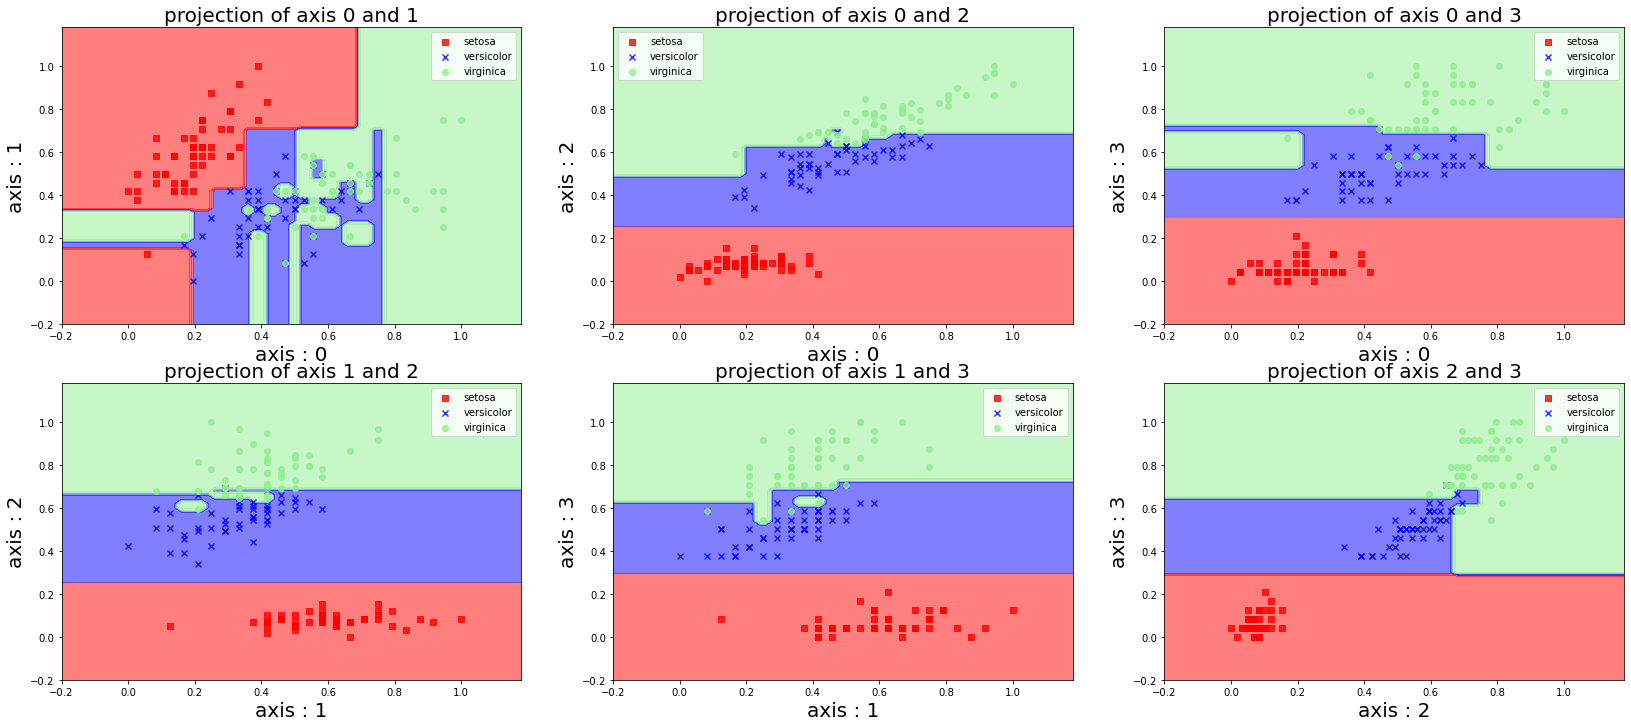

In [25]:
plot_decision_boundary(X,y,20)

#### 深さ30

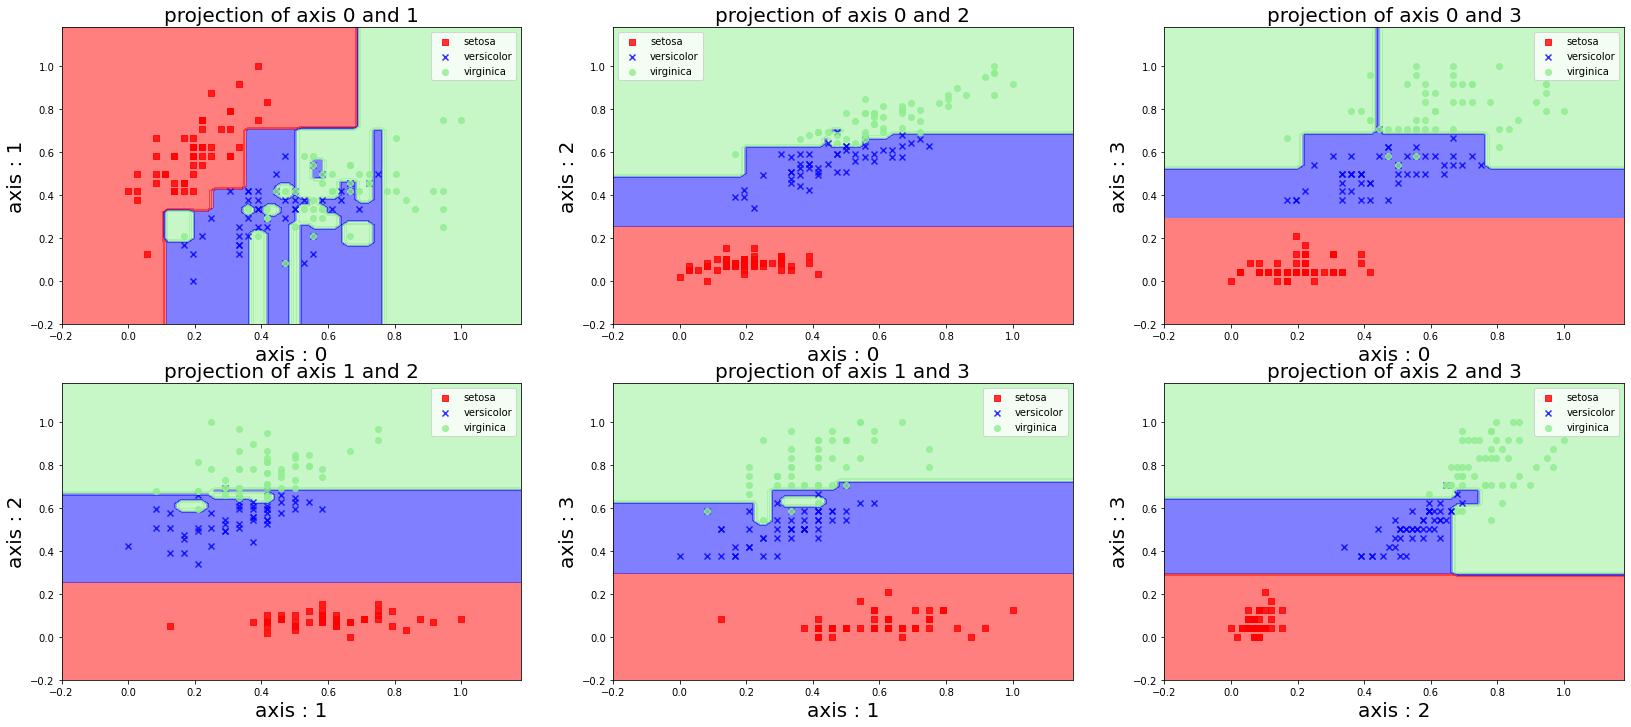

In [26]:
plot_decision_boundary(X,y,30)

グラフより深さを深くすればするほど，分離境界が複雑な形になっていき分類器としての表現力が向上していることが見て取れる．   
一方で最初に見たように深さが5を超えたあたりからは分離境界に大きな変化は見られず十分表現力を得たと言えることがわかる．  
また，比較的分類が難しそうな左上のデータにおいては深さが深くなるについれて分離領域がより複雑になっていき学習データに対して過適合を起こしていることがわかる．  

左上のグラフが過学習を起こしていることを確認するために，それぞれの射影したデータごとに最大深さのパラメータを変えたときに訓練誤差，テスト誤差がどのように変化していくのかを以下のグラフに示す．

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


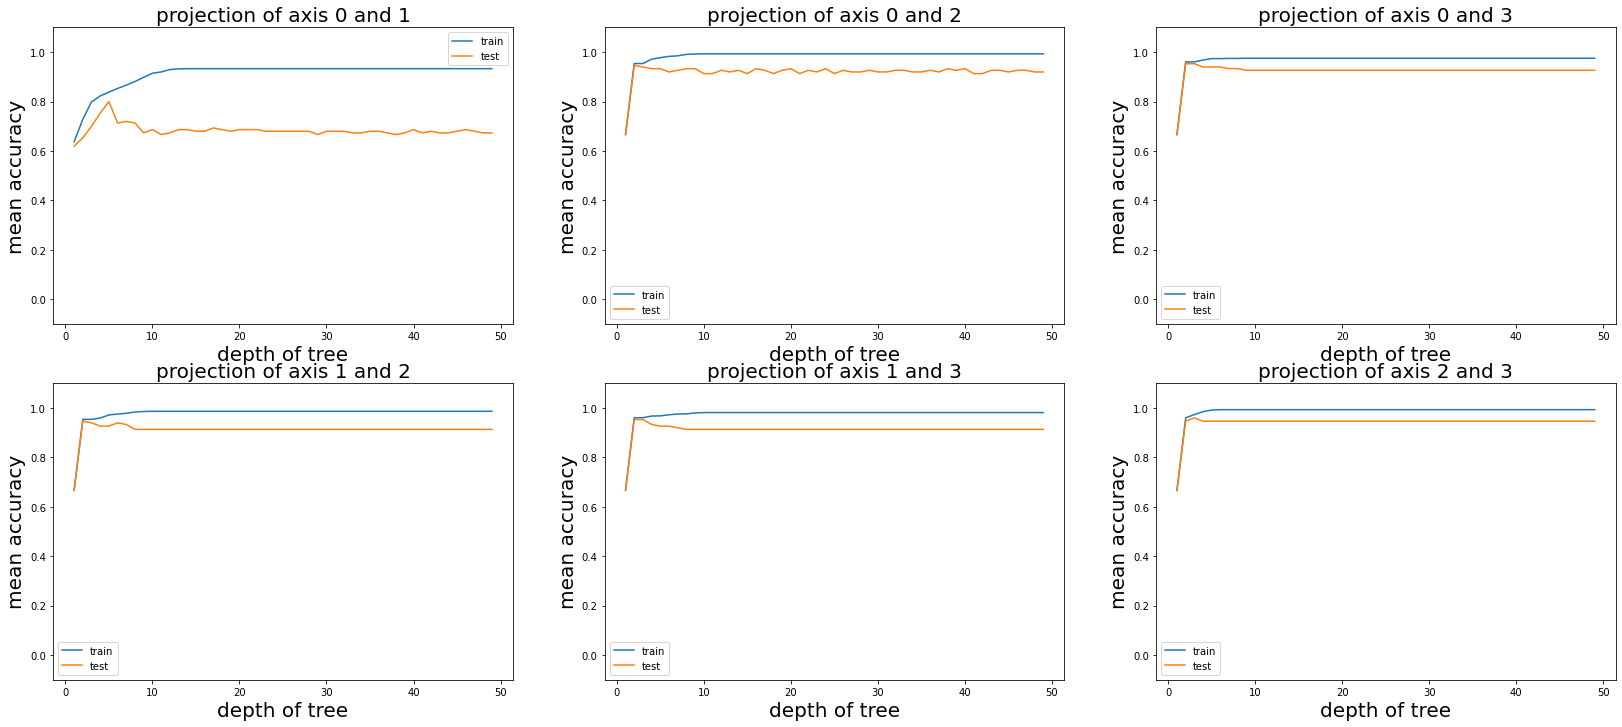

In [27]:
def plot_acc(X, y):
    plt.figure(figsize = (28,12))    
    for ith,axs in enumerate(combinations(range(4),2)):
        ith = ith + 1
        i,j = axs
        x1_min, x1_max = X[:, i].min() , X[:, i].max()
        x2_min, x2_max = X[:, j].min() , X[:, j].max() 
        xx1, xx2 = np.meshgrid(np.arange(x1_min-0.2, x1_max+0.2, 0.02),
                               np.arange(x2_min-0.2, x2_max+0.2, 0.02))
        
        X_std = X[:,:]
        X_std[:,i] = (X[:,i] - x1_min) / (x1_max - x1_min)
        X_std[:,j] = (X[:,j] - x2_min) / (x2_max - x2_min)
        X_std = X_std[:,[i,j]]
        
        depths = list(range(1,50))
        train_scores = []
        test_scores = []
        for d in depths:
            tree= DecisionTreeClassifier(criterion='entropy', max_depth=d)
            scores = cross_validate(tree,X_std, y, cv = 10, return_train_score = True)
            train_score = scores['train_score']
            test_score = scores['test_score']
            train_scores.append(train_score.mean())
            test_scores.append(test_score.mean())            
        plt.subplot(2,3,ith)

        fontsize = 20
        plt.ylim(-0.1,1.1)
        plt.xlabel("depth ", fontsize = fontsize)
        plt.ylabel("axis : {}".format(j), fontsize = fontsize)
        plt.legend()
        plt.plot(depths, train_scores, label = 'train')
        plt.plot(depths, test_scores, label = 'test')
        plt.legend()
        plt.xlabel('depth of tree')
        plt.ylabel('mean accuracy')

        plt.title('projection of axis {} and {}'.format(i,j), fontsize = fontsize)
        
plot_acc(X,y)        

上での考察の通り，左上の軸0,1への射影データに対しては過学習の傾向が顕著に見られた．  
また，その他のデータに対しても深さが2,3あたりがテスト性能の最大値を出していることより，表現力の高さと過学習の関係はトレードオフであり，バリデーションデータなどを用いて良い深さをハイパーパラメータ探索することが必要であると言える．

以上の結果より決定木による学習はダイアグラムを図示できるなど，学習結果の可読性が高いことや深さを深くすれば訓練誤差を限りなく小さくできることなどの利点が挙げられる．  
一方で，深さを深くするにつれて過学習を起こしやすくなる欠点や簡単な線形分離できる場合でも特徴量の軸に対して斜めの分離平面が引きづらい場合があることなどの欠点が挙げられる．